In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Parameters
A = 1        # Amplitude in x-direction
B = 1        # Amplitude in y-direction
a = 5        # Frequency for x(t)
b = 4        # Frequency for y(t)
delta = np.pi / 2  # Phase shift

In [35]:
# Time array
t = np.linspace(0, 2 * np.pi, 1000)
# Parametric equations
x = A * np.sin(a * t + delta)
y = B * np.sin(b * t)

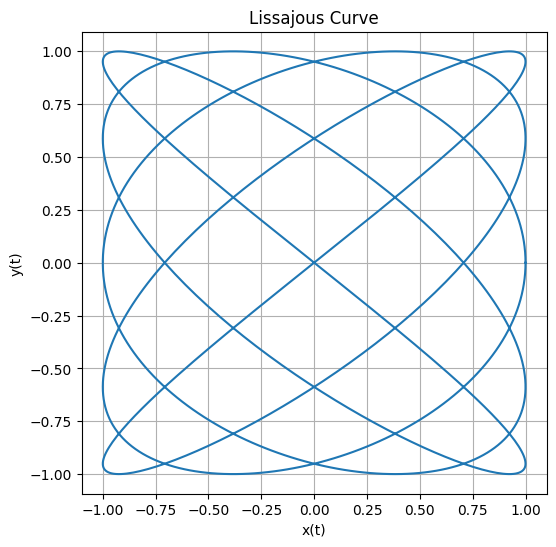

In [42]:
# Plotting the Lissajous curve
plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.title("Lissajous Curve")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.grid(visible=True)
plt.axis('equal')
plt.show()


Epoch 100, Loss: 0.271788
Epoch 200, Loss: 0.051457
Epoch 300, Loss: 0.006185
Epoch 400, Loss: 0.003579
Epoch 500, Loss: 0.002570


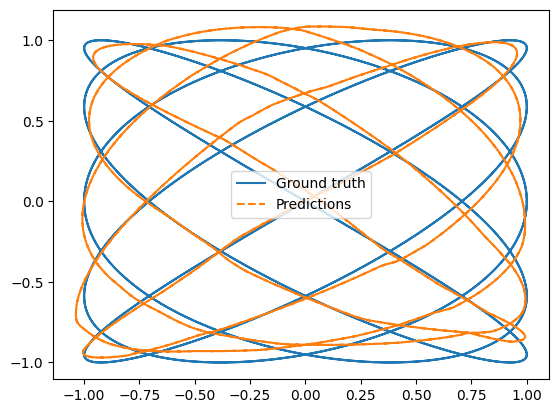

In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Generate data
num_samples = 2000
t = np.linspace(0, 4*np.pi, num_samples)
a, b, delta = 5, 4, np.pi/2
x = np.sin(a * t + delta)
y = np.sin(b * t)
data = np.stack([x, y], axis=1)

# Prepare sequences: model tries to predict data[t+1] from data[t]
X = data[:-1]      # features
Y = data[1:]       # targets
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

# Simple MLP
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 2)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
for epoch in range(500):
    optimizer.zero_grad()
    pred = model(X)
    loss = criterion(pred, Y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

# Evaluate
with torch.no_grad():
    predictions = model(X).numpy()

# Compare predictions with ground truth
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1], label='Ground truth')
plt.plot(predictions[:,0], predictions[:,1], '--', label='Predictions')
plt.legend()
plt.show()


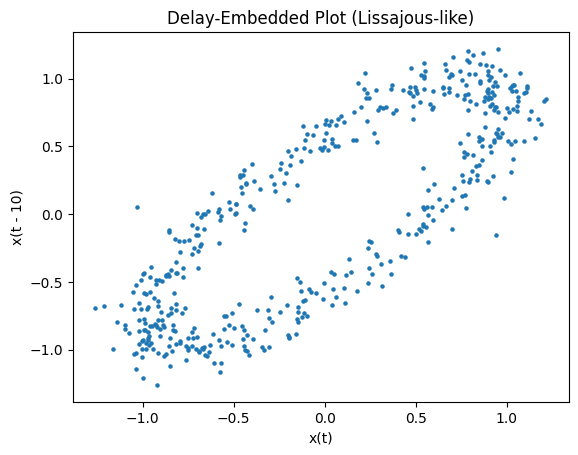

Estimated parameters:
A = 0.998, omega = 1.000, phi = 0.003


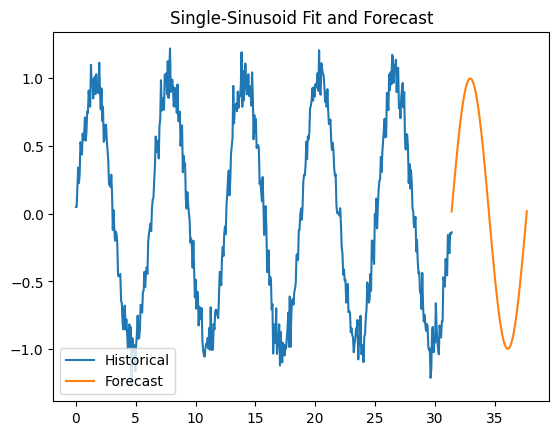

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate sample time series
np.random.seed(42)
t = np.linspace(0, 10*np.pi, 500)
x = np.sin(t) + 0.1 * np.random.randn(len(t))  # Sinusoid plus noise

# 2. Create a delay-embedded version of x
tau = 10  # Choose a delay
x_delayed = np.roll(x, tau)

# 3. Plot the embedded data (which can look like a Lissajous figure if x is strongly sinusoidal)
plt.figure()
plt.scatter(x[tau:], x_delayed[tau:], s=5)
plt.title("Delay-Embedded Plot (Lissajous-like)")
plt.xlabel("x(t)")
plt.ylabel(f"x(t - {tau})")
plt.show()

# 4. Simple forecasting approach: Fit a sum of sinusoids to x(t)

# Let's just do a single-sinusoid fit for illustration:
# Model: x(t) ~ A sin(omega t + phi)
# We'll solve for A, omega, phi by a least-squares approach
from scipy.optimize import curve_fit

def sinusoid(t, A, omega, phi):
    return A * np.sin(omega * t + phi)

initial_guess = [1, 1, 0]  # A=1, omega=1, phi=0
params, cov = curve_fit(sinusoid, t, x, p0=initial_guess)
A_hat, omega_hat, phi_hat = params

print("Estimated parameters:")
print(f"A = {A_hat:.3f}, omega = {omega_hat:.3f}, phi = {phi_hat:.3f}")

# 5. Forecast forward
t_future = np.linspace(10*np.pi, 12*np.pi, 100)
x_forecast = sinusoid(t_future, A_hat, omega_hat, phi_hat)

plt.figure()
plt.plot(t, x, label='Historical')
plt.plot(t_future, x_forecast, label='Forecast')
plt.legend()
plt.title("Single-Sinusoid Fit and Forecast")
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Suppose we have a time series x of length N
# x could be a synthetic or real data set

# 1. Create a delay-embedded representation
tau = 10
X = []
for t in range(tau, len(x)):
    X.append([x[t], x[t - tau]])  # shape (N - tau, 2)
X = np.array(X)

# 2. Convert to a 2D "histogram image"
# Define a grid in the range of X[:,0] and X[:,1]
bins = 50
hist, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins=bins)
# hist is a 2D array of shape (bins, bins)

# For a real dataset, you'd do this in small windows or
# do sliding segments to get multiple images for training

# 3. Prepare data for CNN (batch_size, channels, height, width)
hist = hist[np.newaxis, np.newaxis, :, :]  # single sample, single channel

# 4. Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * (bins//2 - 1) * (bins//2 - 1), 2)  # for example, 2 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# 5. Training would proceed as usual:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# dummy forward pass
outputs = model(torch.from_numpy(hist).float())
target = torch.tensor([1])  # example label
loss = criterion(outputs, target)
loss.backward()
optimizer.step()


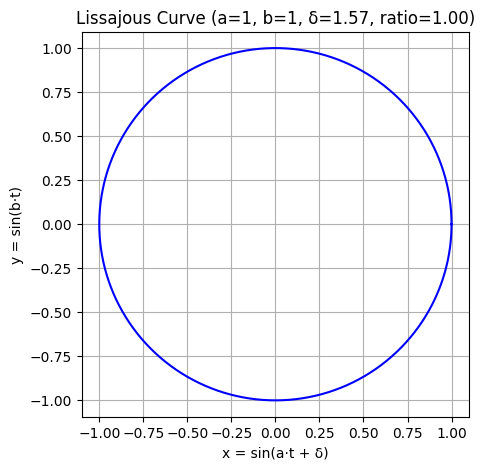

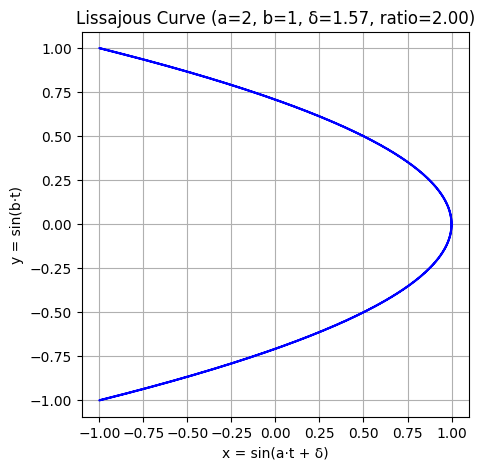

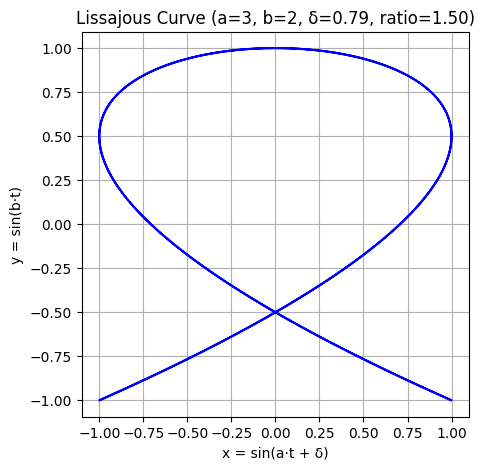

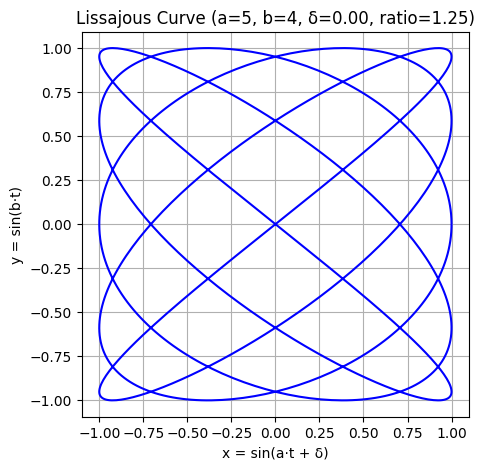

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lissajous(a, b, delta, num_points=1000):
    """
    Plot a static Lissajous curve with parameters a, b, and phase delta.
    
    Parameters:
    -----------
    a : float
        Frequency in x direction
    b : float
        Frequency in y direction
    delta : float
        Phase difference (in radians)
    num_points : int, optional
        Number of points to plot (default: 1000)
    """
    # Create parameter t (time)
    t = np.linspace(0, 2 * np.pi, num_points)
    
    # Generate x and y coordinates using Lissajous equations
    x = np.sin(a * t + delta)
    y = np.sin(b * t)
    
    # Create a figure and plot the curve
    plt.figure(figsize=(5, 5))
    plt.plot(x, y, 'b-')  # Blue line
    
    # Set plot limits, title, and labels
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.grid(True)
    plt.title(f'Lissajous Curve (a={a}, b={b}, δ={delta:.2f})')
    plt.xlabel('x = sin(a·t + δ)')
    plt.ylabel('y = sin(b·t)')
    
    # Add frequency ratio to the title
    ratio = a / b if b != 0 else float('inf')
    plt.title(f'Lissajous Curve (a={a}, b={b}, δ={delta:.2f}, ratio={ratio:.2f})')
    
    # Make axes equal to ensure the curve isn't distorted
    plt.axis('equal')
    
    # Show the plot
    plt.show()

# Example 1: A simple Lissajous figure (a circle for a=b=1, delta=π/2)
plot_lissajous(a=1, b=1, delta=np.pi/2)

# Example 2: Figure-eight shape (a=2, b=1, delta=π/2)
plot_lissajous(a=2, b=1, delta=np.pi/2)

# Example 3: More complex pattern (a=3, b=2, delta=π/4)
plot_lissajous(a=3, b=2, delta=np.pi/4)

# Example 4: Higher frequency ratio (a=5, b=4, delta=0)
plot_lissajous(a=5, b=4, delta=0)

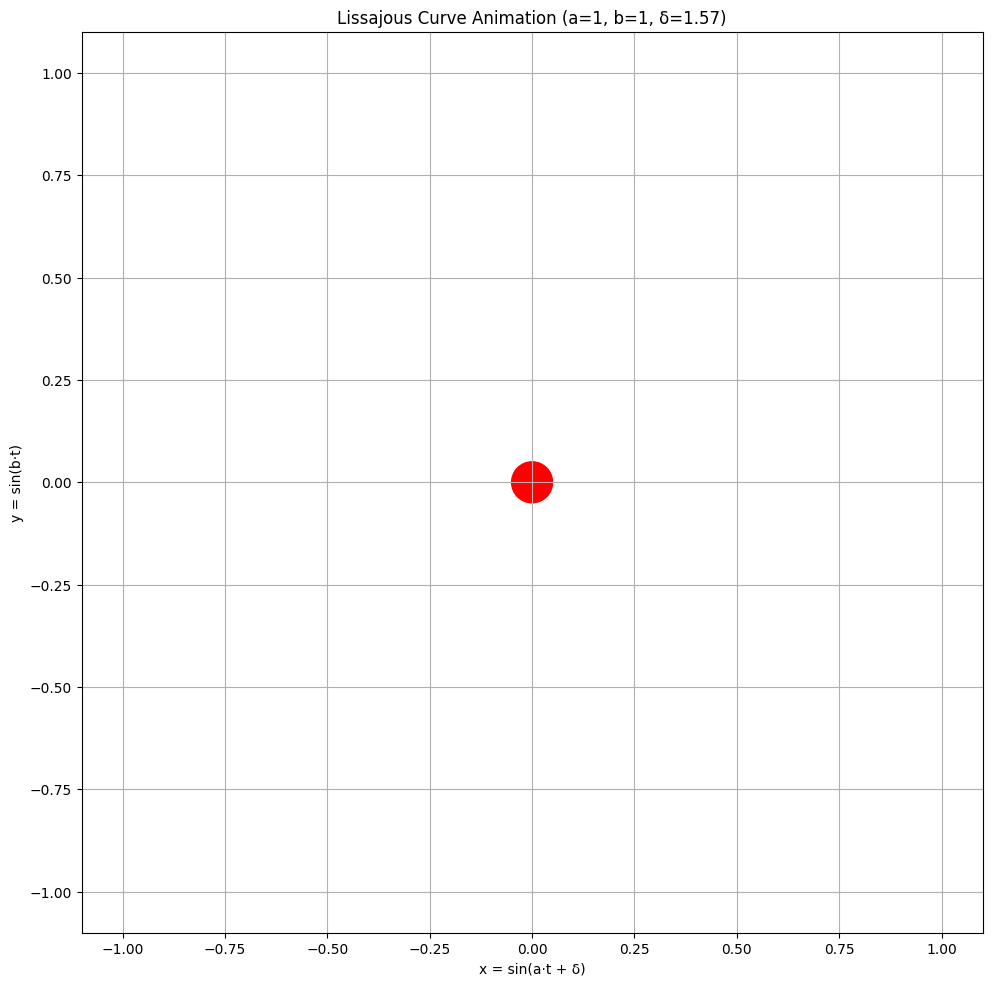

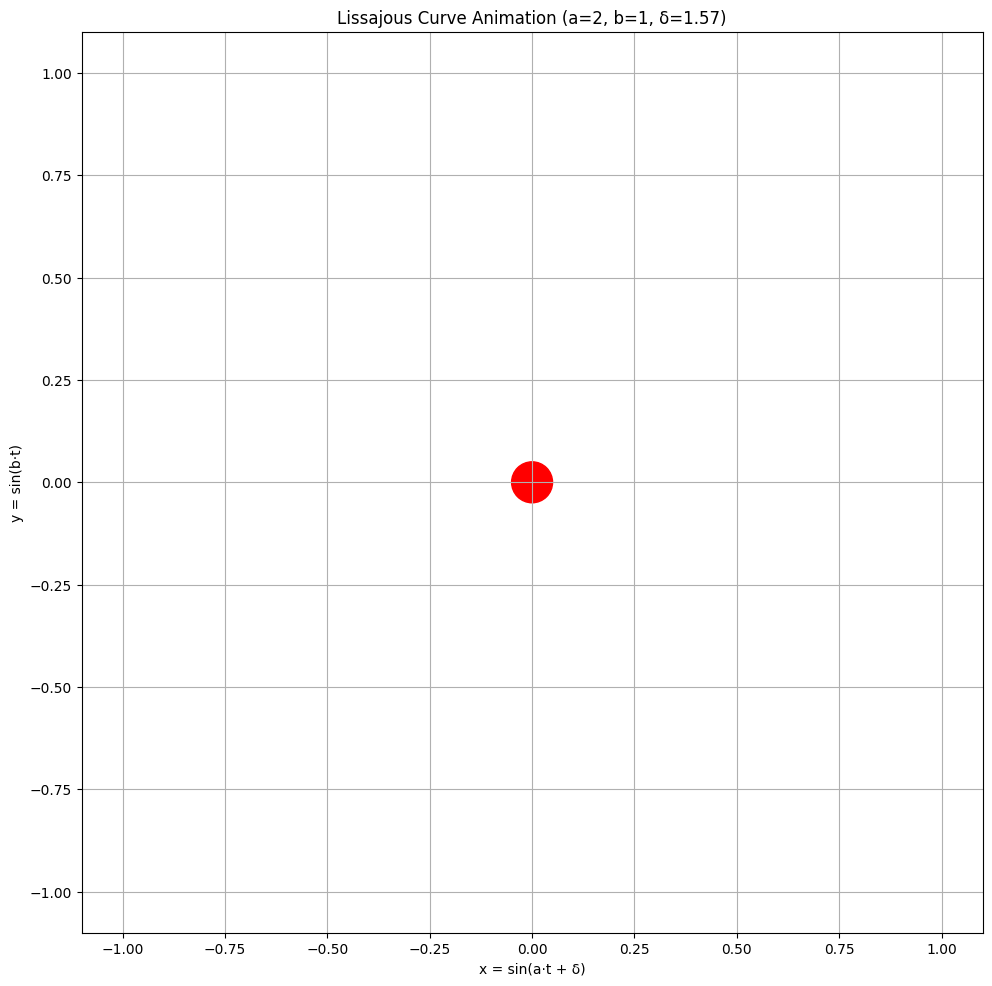

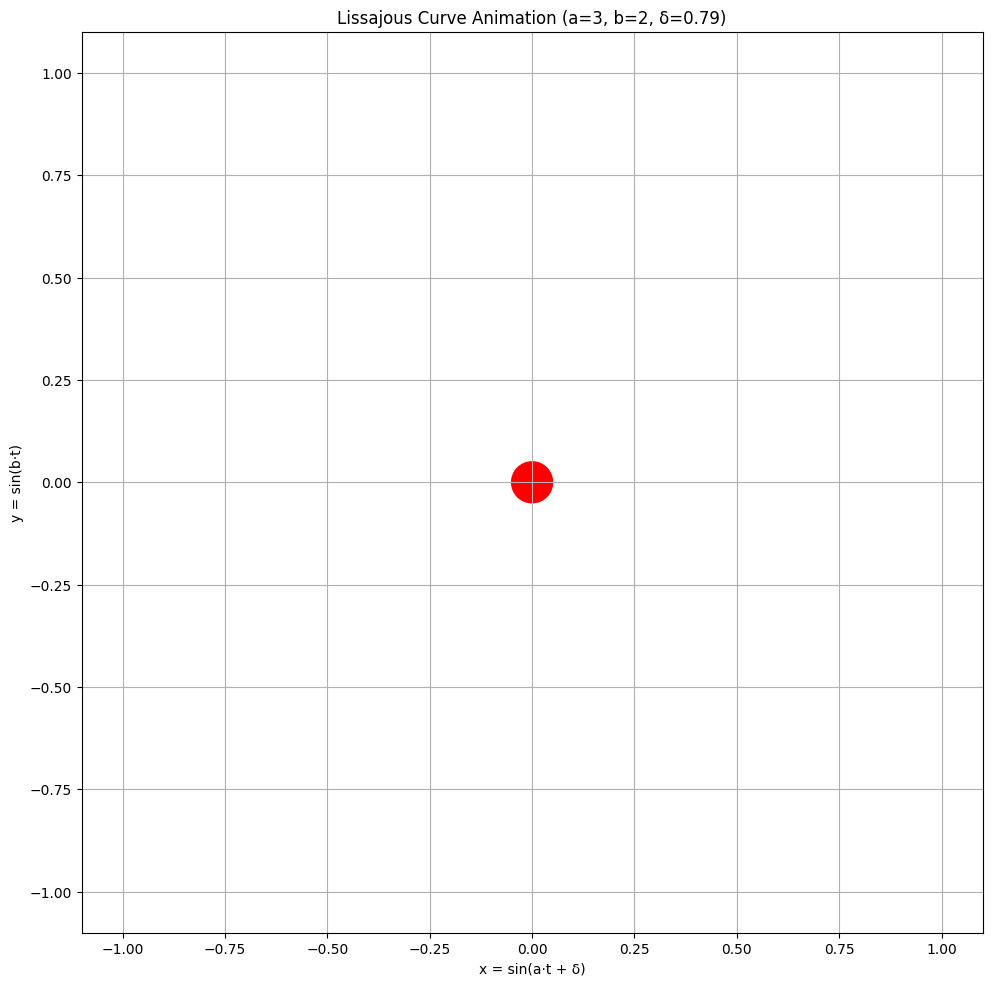

Output()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

def animate_lissajous(a, b, delta=0, duration=10, fps=30, trace_length=None):
    """
    Animate a Lissajous curve with parameters a, b, and phase delta.
    
    Parameters:
    -----------
    a : float
        Frequency in x direction
    b : float
        Frequency in y direction
    delta : float, optional
        Phase difference (in radians, default: 0)
    duration : float, optional
        Animation duration in seconds (default: 10)
    fps : int, optional
        Frames per second (default: 30)
    trace_length : int, optional
        Number of points to keep in the trace. If None, keeps the entire trace.
    """
    # Calculate total number of frames
    frames = int(duration * fps)
    
    # Initialize figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.grid(True)
    ax.set_title(f'Lissajous Curve Animation (a={a}, b={b}, δ={delta:.2f})')
    ax.set_xlabel('x = sin(a·t + δ)')
    ax.set_ylabel('y = sin(b·t)')
    ax.set_aspect('equal')
    
    # Create a circle to represent the moving point
    point = Circle((0, 0), radius=0.05, color='red')
    ax.add_patch(point)
    
    # Create a line for the trace
    line, = ax.plot([], [], 'b-', lw=1.5, alpha=0.8)
    
    # Store the trace history
    x_history = []
    y_history = []
    
    def init():
        """Initialize the animation"""
        point.center = (0, 0)
        line.set_data([], [])
        return point, line
    
    def update(frame):
        """Update function for the animation"""
        # Calculate time parameter
        t = (frame / frames) * 2 * np.pi * duration
        
        # Calculate position using Lissajous equations
        x = np.sin(a * t + delta)
        y = np.sin(b * t)
        
        # Update point position
        point.center = (x, y)
        
        # Update trace history
        x_history.append(x)
        y_history.append(y)
        
        # Limit trace length if specified
        if trace_length is not None and len(x_history) > trace_length:
            del x_history[0]
            del y_history[0]
        
        # Update the line data
        line.set_data(x_history, y_history)
        
        return point, line
    
    # Create the animation
    ani = FuncAnimation(fig, update, frames=frames,
                        init_func=init, blit=True, interval=1000/fps)
    
    plt.tight_layout()
    
    return ani, fig

# Example 1: Simple circle (a=1, b=1, delta=π/2)
ani1, fig1 = animate_lissajous(a=1, b=1, delta=np.pi/2, duration=5, trace_length=100)

# To save animation as a gif (commented out by default)
# ani1.save('lissajous_circle.gif', writer='pillow', fps=30)

# Example 2: Figure-eight (a=2, b=1, delta=π/2)
ani2, fig2 = animate_lissajous(a=2, b=1, delta=np.pi/2, duration=5, trace_length=200)

# Example 3: Complex pattern with a=3, b=2, delta=π/4
ani3, fig3 = animate_lissajous(a=3, b=2, delta=np.pi/4, duration=10, trace_length=300)

# Display the animations
plt.show()

# Interactive version (uncomment to use)
import ipywidgets as widgets
from IPython.display import display

def interactive_lissajous():
    # Create sliders for parameters
    a_slider = widgets.FloatSlider(value=1, min=1, max=10, step=0.1, 
                                  description='a:')
    b_slider = widgets.FloatSlider(value=1, min=1, max=10, step=0.1, 
                                  description='b:')
    delta_slider = widgets.FloatSlider(value=0, min=0, max=np.pi*2, step=np.pi/12, 
                                      description='δ:')
    trace_slider = widgets.IntSlider(value=100, min=10, max=500, step=10, 
                                    description='Trace Length:')
    
    # Create a button to generate animation
    button = widgets.Button(description="Generate Animation")
    output = widgets.Output()
    
    def on_button_clicked(b):
        with output:
            output.clear_output()
            a = a_slider.value
            b = b_slider.value
            delta = delta_slider.value
            trace_length = trace_slider.value
            
            ani, fig = animate_lissajous(a, b, delta, duration=5, 
                                         trace_length=trace_length)
            plt.show()
    
    button.on_click(on_button_clicked)
    
    # Display controls
    controls = widgets.VBox([a_slider, b_slider, delta_slider, trace_slider, button])
    display(controls, output)

# Run the interactive function
interactive_lissajous()

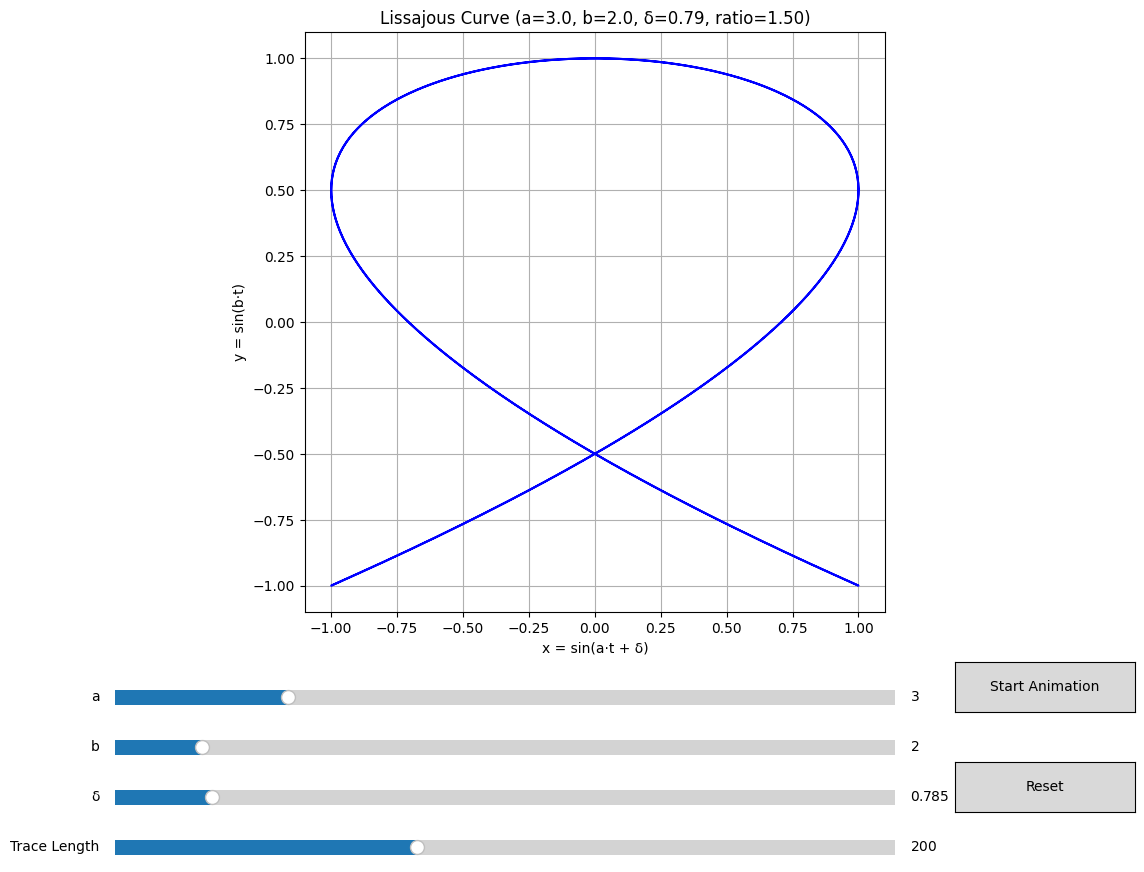

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.animation as animation

class LissajousDashboard:
    def __init__(self):
        # Set up the figure and subplots
        self.fig = plt.figure(figsize=(12, 10))
        self.ax = self.fig.add_subplot(111)
        plt.subplots_adjust(left=0.1, bottom=0.3)
        
        # Initial parameter values
        self.a_init = 3
        self.b_init = 2
        self.delta_init = np.pi/4
        self.num_points = 1000
        self.trace_length = 200
        
        # Animation control
        self.animation_running = False
        self.anim = None
        self.t = 0  # Time parameter
        
        # Set up plot
        self.setup_plot()
        
        # Create sliders
        self.create_sliders()
        
        # Create buttons
        self.create_buttons()
        
        # Plot initial curve
        self.update_static_curve(None)
    
    def setup_plot(self):
        """Set up the plot appearance"""
        self.ax.set_xlim(-1.1, 1.1)
        self.ax.set_ylim(-1.1, 1.1)
        self.ax.grid(True)
        self.ax.set_aspect('equal')
        self.ax.set_title(f'Lissajous Curve (a={self.a_init}, b={self.b_init}, δ={self.delta_init:.2f})')
        self.ax.set_xlabel('x = sin(a·t + δ)')
        self.ax.set_ylabel('y = sin(b·t)')
        
        # Create a line object for the static curve
        self.line, = self.ax.plot([], [], 'b-', lw=1.5)
        
        # Create a point object for the animation
        self.point, = self.ax.plot([], [], 'ro', markersize=8)
        
        # Create a line for the trace
        self.trace, = self.ax.plot([], [], 'r-', lw=1, alpha=0.5)
        self.trace_history_x = []
        self.trace_history_y = []
    
    def create_sliders(self):
        """Create parameter sliders"""
        # Create axes for sliders
        ax_a = plt.axes([0.1, 0.2, 0.65, 0.03])
        ax_b = plt.axes([0.1, 0.15, 0.65, 0.03])
        ax_delta = plt.axes([0.1, 0.1, 0.65, 0.03])
        ax_trace = plt.axes([0.1, 0.05, 0.65, 0.03])
        
        # Create sliders
        self.slider_a = Slider(ax_a, 'a', 1, 10, valinit=self.a_init, valstep=0.1)
        self.slider_b = Slider(ax_b, 'b', 1, 10, valinit=self.b_init, valstep=0.1)
        self.slider_delta = Slider(ax_delta, 'δ', 0, 2*np.pi, valinit=self.delta_init, valstep=np.pi/12)
        self.slider_trace = Slider(ax_trace, 'Trace Length', 10, 500, valinit=self.trace_length, valstep=10)
        
        # Register update functions
        self.slider_a.on_changed(self.update_static_curve)
        self.slider_b.on_changed(self.update_static_curve)
        self.slider_delta.on_changed(self.update_static_curve)
        self.slider_trace.on_changed(self.update_trace_length)
    
    def create_buttons(self):
        """Create control buttons"""
        # Create axes for buttons
        ax_anim = plt.axes([0.8, 0.2, 0.15, 0.05])
        ax_reset = plt.axes([0.8, 0.1, 0.15, 0.05])
        
        # Create buttons
        self.button_anim = Button(ax_anim, 'Start Animation')
        self.button_reset = Button(ax_reset, 'Reset')
        
        # Register update functions
        self.button_anim.on_clicked(self.toggle_animation)
        self.button_reset.on_clicked(self.reset)
    
    def update_static_curve(self, val):
        """Update the static curve when parameters change"""
        # Get current parameter values
        a = self.slider_a.val
        b = self.slider_b.val
        delta = self.slider_delta.val
        
        # Generate new curve data
        t = np.linspace(0, 2 * np.pi, self.num_points)
        x = np.sin(a * t + delta)
        y = np.sin(b * t)
        
        # Update the line data
        self.line.set_data(x, y)
        
        # Update title with frequency ratio
        ratio = a / b if b != 0 else float('inf')
        self.ax.set_title(f'Lissajous Curve (a={a:.1f}, b={b:.1f}, δ={delta:.2f}, ratio={ratio:.2f})')
        
        # Redraw the canvas
        self.fig.canvas.draw_idle()
        
        # Reset trace history if animation is running
        self.trace_history_x = []
        self.trace_history_y = []
        self.trace.set_data([], [])
    
    def update_trace_length(self, val):
        """Update the trace length"""
        self.trace_length = int(self.slider_trace.val)
        
        # Trim trace history if needed
        if len(self.trace_history_x) > self.trace_length:
            self.trace_history_x = self.trace_history_x[-self.trace_length:]
            self.trace_history_y = self.trace_history_y[-self.trace_length:]
            self.trace.set_data(self.trace_history_x, self.trace_history_y)
            self.fig.canvas.draw_idle()
    
    def animate(self, frame):
        """Animation update function"""
        # Get current parameter values
        a = self.slider_a.val
        b = self.slider_b.val
        delta = self.slider_delta.val
        
        # Update time parameter
        self.t += 0.02
        
        # Calculate new position
        x = np.sin(a * self.t + delta)
        y = np.sin(b * self.t)
        
        # Update point position
        self.point.set_data([x], [y])
        
        # Update trace history
        self.trace_history_x.append(x)
        self.trace_history_y.append(y)
        
        # Limit trace length
        if len(self.trace_history_x) > self.trace_length:
            self.trace_history_x.pop(0)
            self.trace_history_y.pop(0)
        
        # Update trace line
        self.trace.set_data(self.trace_history_x, self.trace_history_y)
        
        return self.point, self.trace
    
    def toggle_animation(self, event):
        """Toggle animation on/off"""
        if not self.animation_running:
            # Start animation
            self.anim = animation.FuncAnimation(
                self.fig, self.animate, interval=30, blit=True)
            self.button_anim.label.set_text('Stop Animation')
            self.animation_running = True
        else:
            # Stop animation
            if self.anim is not None:
                self.anim.event_source.stop()
                self.anim = None
            self.button_anim.label.set_text('Start Animation')
            self.animation_running = False
        self.fig.canvas.draw_idle()
    
    def reset(self, event):
        """Reset all parameters to initial values"""
        # Stop animation if running
        if self.animation_running:
            self.toggle_animation(None)
        
        # Reset sliders
        self.slider_a.set_val(self.a_init)
        self.slider_b.set_val(self.b_init)
        self.slider_delta.set_val(self.delta_init)
        self.slider_trace.set_val(self.trace_length)
        
        # Reset trace
        self.trace_history_x = []
        self.trace_history_y = []
        self.trace.set_data([], [])
        self.point.set_data([], [])
        self.t = 0
        
        # Update plot
        self.update_static_curve(None)
    
    def show(self):
        """Display the dashboard"""
        plt.show()

# Create and show the dashboard
if __name__ == "__main__":
    dashboard = LissajousDashboard()
    dashboard.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

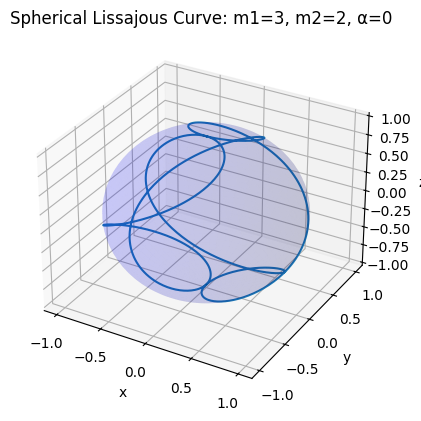

In [3]:
def spherical_lissajous(m1, m2, alpha, num_points=1000):
    t = np.linspace(0, 2 * np.pi, num_points)
    x = np.sin(m2 * t) * np.cos(m1 * t - alpha * np.pi)
    y = np.sin(m2 * t) * np.sin(m1 * t - alpha * np.pi)
    z = np.cos(m2 * t)
    return x, y, z

x, y, z = spherical_lissajous(3, 2, 0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_title('Spherical Lissajous Curve: m1=3, m2=2, α=0')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.1)
plt.show()